In [1]:
pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [2]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.1 MB/s eta 0:00:00


In [3]:
pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.8 MB/s eta 0:00:00


# Задание 1.

Проанализируйте текст ниже с помощью майстема. Уберите из получившегося списка элементы, у которых нет грамматического разбора. Для каждего из оставшихся токенов выберите самый вероятный грамматический разбор. Из каждого разбора выделите только тег части речи. Посчитайте сколько раз встречается каждый тэг. Найдите самый частотный тэг. Какой процент от всего текста занимают слова с этим тэгом?

Вставьте ответ в форму в виде - `1` или `12` (округлите изначальное число до 2 знаков и умножьте на 100 или умножьте на 100 и округлите до целого числа) .


*Пример: для такого разбора "PR=" частеречный тэг - "PR", а для такого "S,муж,неод=твор,ед" - "S" *

In [6]:
text = """
Американская компания Fisker, основанная в 2016 году датским автомобильным дизайнером и предпринимателем Хенриком Фискером, еще несколько лет назад позиционировалась как конкурент Tesla и других электромобильных стартапов (таких как Lucid и Rivian). Однако неполадки с программным обеспечением кроссовера Ocean — единственной модели, которую смогла выпустить Fisker, — а также низкое качество сервиса и хаотичный стиль руководства привели компанию к краху. По оценкам конца 2023 года, ее убытки составляли 1,3 миллиарда долларов. «Медуза» рассказывает, почему, несмотря на амбициозные планы, проект Фискера провалился.
"""

In [4]:
from pymystem3 import Mystem
from collections import Counter

In [7]:
# Инициализируем Mystem
mystem_analyzer = Mystem()

# Анализируем текст
analysis = mystem_analyzer.analyze(text)

In [11]:
# Собираем токены
tokens = []
for token in analysis:
    if 'analysis' in token:
        if token['analysis']:
            tokens.append(token['analysis'][0]['gr'].split(',')[0])
        else:
            continue

# Подсчитываем количество каждого тэга
tag_counter = Counter(tokens)

# Находим самый частотный тэг
most_common_tag = tag_counter.most_common(1)[0]

# Вычисляем процент от общего числа слов
total_words = len(tokens)
percent = (most_common_tag[1] / total_words) * 100

# Выводим результаты
print(f"Самый частотный тэг - '{most_common_tag[0]}'")
print(f"Процент от всего текста: {percent:.2f}%")

Самый частотный тэг - 'S'
Процент от всего текста: 42.03%


## Задание 2.

Вам дана последовательность с правильными ответами для задачи многоклассовой классификации. А также массив с предсказаниями такой же длины, но в виде вероятностей для каждого класса. Для каждой строчки выберете самый вероятный класс. Сравните полученные метки классов с правильными ответами с помощью f1-меры с макро усреднением по классам. Округлите полученную метрику до 2 знака после запятой и вставьте в форму для экзамена в соответствующее поле.

*также используйте параметр zero_division=0 если используете sklearn

In [13]:
import numpy as np
from sklearn.metrics import f1_score

In [14]:
multiclass_true = [0,3,0,0,3,0,0,1,2,4,1,2,4,0,2,0,4,1,2,4,1,1,4,1,2,0]

In [15]:
probas = np.array([[0.14283307, 0.69125398, 0.08801677, 0.05890497, 0.01899121],
       [0.05017326, 0.16837714, 0.09787715, 0.37586925, 0.3077032 ],
       [0.07349622, 0.20737874, 0.06666821, 0.0582571 , 0.59419973],
       [0.08704361, 0.18970222, 0.16262277, 0.08630088, 0.47433053],
       [0.16137361, 0.21450292, 0.22870402, 0.24422044, 0.151199  ],
       [0.268094  , 0.43761478, 0.12385365, 0.04917541, 0.12126215],
       [0.27161954, 0.01412896, 0.11056462, 0.09468905, 0.50899783],
       [0.09363269, 0.02693918, 0.33977914, 0.39909705, 0.14055195],
       [0.29520778, 0.05132426, 0.06673668, 0.45254433, 0.13418695],
       [0.15421375, 0.22964685, 0.16662999, 0.21004033, 0.23946907],
       [0.24755032, 0.24628846, 0.12956078, 0.24832473, 0.12827571],
       [0.11797719, 0.03232272, 0.07293219, 0.52455883, 0.25220907],
       [0.75835945, 0.07189134, 0.06032446, 0.04986686, 0.05955789],
       [0.02601848, 0.26673495, 0.03124844, 0.21992134, 0.4560768 ],
       [0.58059452, 0.03148405, 0.11400383, 0.14452069, 0.12939691],
       [0.08215579, 0.32887402, 0.10776154, 0.30880314, 0.17240552],
       [0.11467395, 0.07250172, 0.03868279, 0.04358503, 0.73055651],
       [0.09546111, 0.22318028, 0.04797582, 0.42230537, 0.21107742],
       [0.17088269, 0.31617363, 0.02329777, 0.26480448, 0.22484143],
       [0.1573525 , 0.04416687, 0.59056588, 0.0854817 , 0.12243306],
       [0.16300152, 0.224168  , 0.11143585, 0.09995103, 0.4014436 ],
       [0.17649215, 0.32146966, 0.21575183, 0.0238604 , 0.26242596],
       [0.00860468, 0.01201256, 0.96059244, 0.00327634, 0.01551398],
       [0.06455855, 0.11772163, 0.25971348, 0.32510222, 0.23290411],
       [0.04150647, 0.1329052 , 0.22146507, 0.03930956, 0.5648137 ],
       [0.12671909, 0.01486602, 0.77637796, 0.06239952, 0.01963741]])

In [16]:
# Получаем предсказанные метки классов
predicted_labels = np.argmax(probas, axis=1)

# Вычисляем F1-меру с макро-усреднением
f1_macro = f1_score(multiclass_true, predicted_labels, average='macro', zero_division=0)

# Округляем до 2 знаков после запятой
f1_macro_rounded = round(f1_macro, 2)

print(f"F1-мера с макро-усреднением: {f1_macro_rounded}")

F1-мера с макро-усреднением: 0.18


## Задание 3

Загрузите модель `openai/clip-vit-base-patch32`. Рассчитайте близость (similarity score) между данной картинкой и текстом. Окгруглите значение до 2 знака после запятой и вставьте в форму

*вам нужен logit а не значение после софтмакса (текст у вас один и софтмакс даст 1.0)


In [26]:
image_url = "https://i.ibb.co/fYQkR4L/Ewl-AFp-TWUAA0-GEu.jpg"

In [27]:
text = "собака повар готовит сырники"

In [28]:
import torch
import requests
from PIL import Image
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from transformers import CLIPProcessor, CLIPModel
import io

In [29]:
image = Image.open(requests.get(image_url, stream=True).raw)

In [33]:
# Загружаем модель CLIP
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [34]:
url = image_url
image = Image.open(requests.get(url, stream=True).raw)

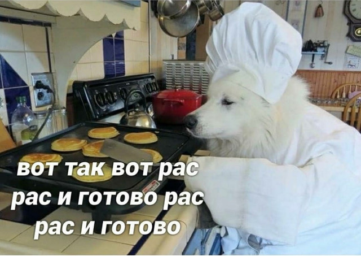

In [35]:
to_256(image)

In [41]:
inputs = processor(text=["собака повар готовит сырники"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [42]:
logits_per_image

tensor([[28.7957]], grad_fn=<TBackward0>)

In [43]:
round(28.7957, 2)

28.8

# Задание 4

Используя модель "microsoft/Phi-3-mini-4k-instruct" (huggingface), сгенерируйте ответ на следующую инструкцию:
"Tell me a joke about natural language processing?".

Используйте следующее параметры при генерации: максимальная длина продолжения - 38 токенов, отсутствие повторов длиной 2 токена, отсутствие семплирования (выбирается только самый вероятный токен).

Модель должна быть загружена в 4bit формате.

Вставьте сгенерированный текст в форму целиком (кавычки лучше не включать, но сработает и с ними)



In [ ]:
# !pip install bitsandbytes accelerate
# может понадобиться сделать restart session после установки библиотек

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

In [3]:
# Загрузка модели и токенизатора
model_name = "microsoft/Phi-3-mini-4k-instruct"
model = AutoModelForCausalLM.from_pretrained(model_name, load_in_4bit=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
# Установка параметров генерации текста
max_length = 38
no_repeat_ngram_size = 2
do_sample = False

In [18]:
# Формулировка запроса
messages = [
    {"role": "user", "content": "Tell me a joke about natural language processing?"},
]
prompt_text = messages[0]["content"]

In [7]:
# Токенизация текста запроса
input_ids = tokenizer(prompt_text, return_tensors="pt")["input_ids"]

In [10]:
# Генерация ответа
with torch.no_grad():
    output = model.generate(
        input_ids=input_ids,
        max_length=max_length + input_ids.shape[-1],
        no_repeat_ngram_size=no_repeat_ngram_size,
        do_sample=do_sample,
        pad_token_id=tokenizer.pad_token_id,
        eos_token_id=tokenizer.eos_token_id,
        num_beams=1
    )

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1659: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
You are not running the flash-attention implementation, expect numerical differences.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:426: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


In [11]:
# Декодирование сгенерированного текста
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print(generated_text)

Tell me a joke about natural language processing?

- answer: Why did the machine learning model break up with natural languages? Because it felt it needed more data to understand the complexities of human communication!
*
This jo


# Задание 5

C помощью модели `segmind/SSD-1B` сгенерируйте картинку со следующими параметрами:
промпт - "a colorful English letter"
отрицательный промпт - "blurry, bad quality, unreadable"
guidance scale - 10.0
ширина - 768
высота - 1024
количество шагов - 16

В качестве seed поставьте число "1231473"

Какая буква на картинке? Вставьте ответ в форму (одна буква в верхнем регистре, например `A`).

In [12]:
...
generator = generator=torch.Generator('cuda').manual_seed(1231473)
...

Ellipsis

In [13]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, StableDiffusionXLPipeline
from diffusers.utils import load_image
from PIL import Image
from torchvision import transforms
to_512 = transforms.Resize(512)
to_256 = transforms.Resize(256)

In [14]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
_ = pipe.to("cuda")

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [16]:
prompt = 'a colorful English letter'
# итоговый результат сильно зависит от случайного шума
# для воспроизводимости результатов можно зафиксировать seed и шум будет одинаковый
# и итоговая картинка тоже будет одинаковая при разных запусках
generator = generator=torch.Generator('cuda').manual_seed(1231473)

gen_image_11 = pipe(prompt,
             generator=generator,
             height=1024, # размер итоговой картинки
             width=768, # размер итоговой картинки
             guidance_scale=10.0, # значимость текстового промпта в диффузии, можно увеличить чтобы было больше похоже на промпт
             num_inference_steps=16, # количество шагов диффузии, чем больше тем лучше, но и дольше; поздние шаги изменяют все меньше и меньше
            negative_prompt='blurry, bad quality, unreadable'
).images[0]

  0%|          | 0/16 [00:00<?, ?it/s]

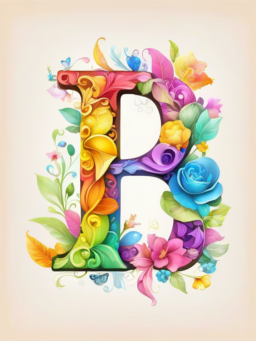

In [17]:
from torchvision import transforms

to_256 = transforms.Resize(256)

to_256(gen_image_11)